In [2]:
# Cell 2: load dataset using the helper
from src.data_utils import load_housing, get_split

X, y = load_housing()
print("X shape:", X.shape)
print("y shape:", y.shape)

display(X.head())
display(y.describe())

X shape: (20640, 8)
y shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

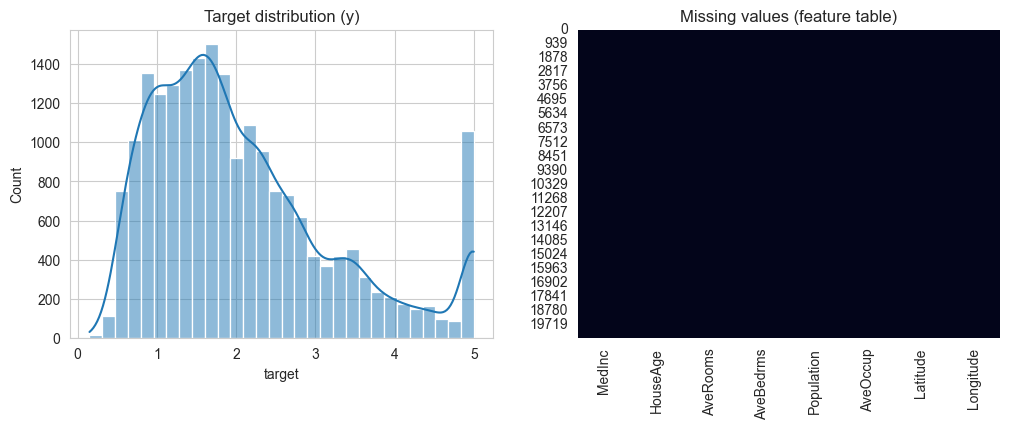

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [3]:
# Cell 3: Explore distributions and missing values
# target distribution
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(y, bins=30, kde=True, ax=ax[0])
ax[0].set_title("Target distribution (y)")

# check for missing values
sns.heatmap(X.isnull(), cbar=False, ax=ax[1])
ax[1].set_title("Missing values (feature table)")
plt.show()

# quick summary
display(X.describe())

In [1]:
# 01_data_and_baseline.ipynb
# Cell 1: imports and settings
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make plots inline and reasonably sized
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style("whitegrid")

# make sure src package is importable (only needed if Jupyter can't see src)
import sys
sys.path.append(os.path.abspath('..'))  # project root relative to notebooks/

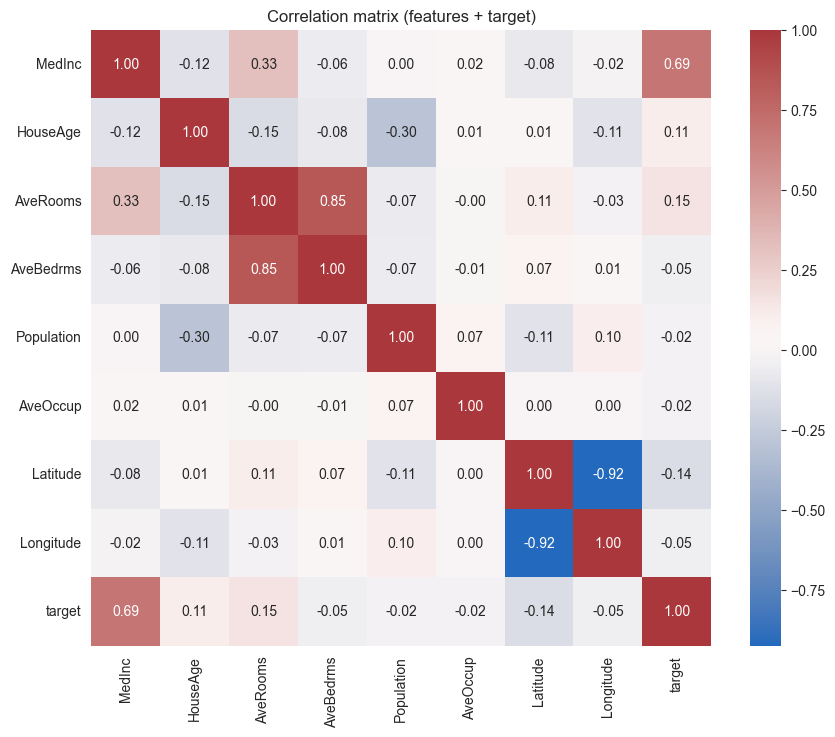

MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: target, dtype: float64

In [4]:
# Cell 4: correlation heatmap and top correlated features with target
corr = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlation matrix (features + target)")
plt.show()

# Show features most correlated with target (sorted)
target_corr = corr['target'].drop('target').abs().sort_values(ascending=False)
display(target_corr.head(8))


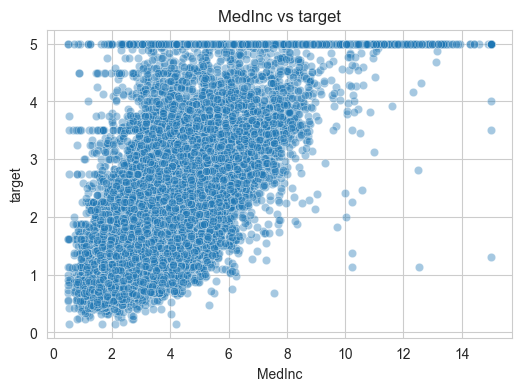

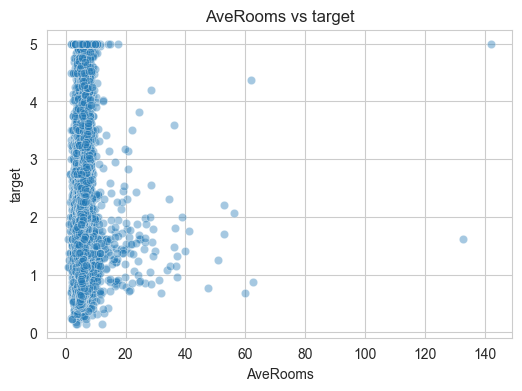

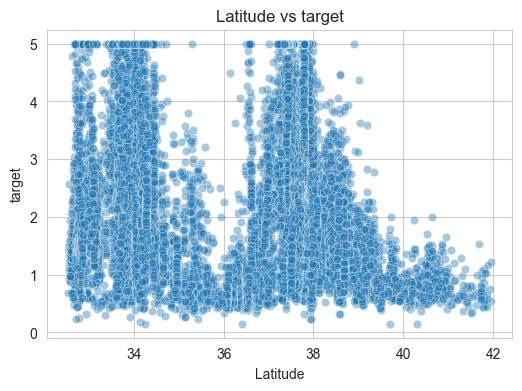

In [ ]:
# Cell 5: scatter for top 3 correlated features
top_features = list(target_corr.head(3).index)
for f in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X[f], y=y, alpha=0.4)
    plt.title(f"{f} vs target")
    plt.xlabel(f)
    plt.ylabel("target")
    plt.show()

In [ ]:
# Cell 6: train/test split and baseline linear regression
from sklearn.model_selection import train_test_split
from src.models import train_model, evaluate

X_train, X_test, y_train, y_test = get_split(X, y, test_size=0.2, random_state=42)
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

# baseline linear
model = train_model("linear", X_train, y_train)
metrics = evaluate(model, X_test, y_test)
print("Baseline metrics:", metrics)

Train shapes: (16512, 8) (16512,)
Test shapes: (4128, 8) (4128,)
Baseline metrics: {'rmse': 0.7455813830127763, 'r2': 0.575787706032451, 'predictions': array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))}


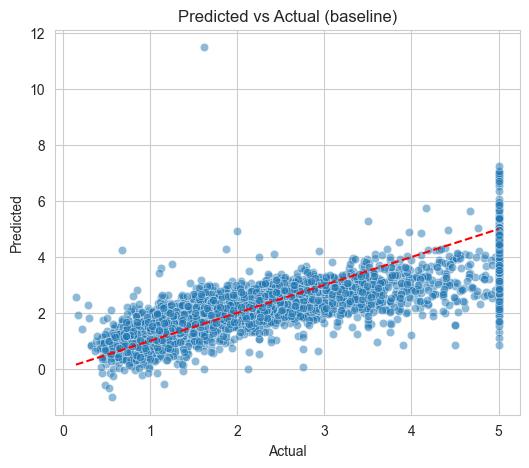

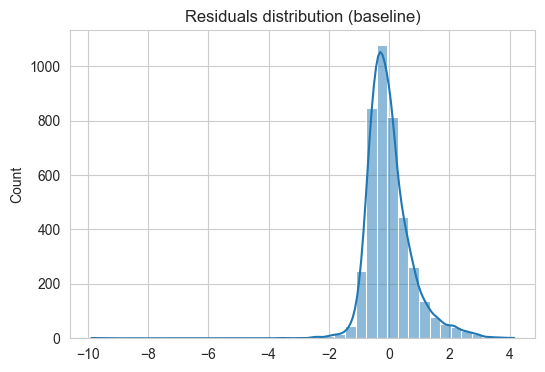

In [ ]:
# Cell 7: predicted vs actual and residual plot
preds = metrics['predictions']  # evaluate returned predictions
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (baseline)")
plt.show()

# residuals
residuals = y_test.values - preds
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals distribution (baseline)")
plt.show()

In [1]:
# Cell 8: save model artifact (optional)
import joblib, os
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/baseline_linear.joblib")
print("Saved baseline model to ../models/baseline_linear.joblib")

NameError: name 'model' is not defined